In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import random
random.seed(7)

In [2]:
X_train = pd.read_csv('/Users/seda/Documents/Human_Activity_Fitbit/UCI HAR Dataset/train/X_train.txt', sep='\s+', header=None)
y_train = pd.read_csv('/Users/seda/Documents/Human_Activity_Fitbit/UCI HAR Dataset/train/y_train.txt', sep='\s+', header=None)

In [3]:
ncolumns = pd.read_csv('/Users/seda/Documents/Human_Activity_Fitbit/UCI HAR Dataset/features.txt', sep='\s+', header=None, index_col=0).reset_index(drop=True)

In [4]:
ncolumns[1] = ncolumns[1].str.replace(',','_')
ncolumns[1] = ncolumns[1].str.replace('(','_')
ncolumns[1] = ncolumns[1].str.replace(')','_')
ncolumns[1] = ncolumns[1].str.replace('-','_')
ncols = list(set(ncolumns[1]))

In [5]:
X_train.columns = ncolumns[1]
y_train.columns = ['label']
train = pd.concat([X_train,y_train],axis=1)

In [6]:
train.shape

(7352, 562)

In [7]:
train.head()

,tBodyAcc_mean___X,tBodyAcc_mean___Y,tBodyAcc_mean___Z,tBodyAcc_std___X,tBodyAcc_std___Y,tBodyAcc_std___Z,tBodyAcc_mad___X,tBodyAcc_mad___Y,tBodyAcc_mad___Z,tBodyAcc_max___X,...,fBodyBodyGyroJerkMag_skewness__,fBodyBodyGyroJerkMag_kurtosis__,angle_tBodyAccMean_gravity_,angle_tBodyAccJerkMean__gravityMean_,angle_tBodyGyroMean_gravityMean_,angle_tBodyGyroJerkMean_gravityMean_,angle_X_gravityMean_,angle_Y_gravityMean_,angle_Z_gravityMean_,label
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5


In [8]:
train.describe(include='all')

,tBodyAcc_mean___X,tBodyAcc_mean___Y,tBodyAcc_mean___Z,tBodyAcc_std___X,tBodyAcc_std___Y,tBodyAcc_std___Z,tBodyAcc_mad___X,tBodyAcc_mad___Y,tBodyAcc_mad___Z,tBodyAcc_max___X,...,fBodyBodyGyroJerkMag_skewness__,fBodyBodyGyroJerkMag_kurtosis__,angle_tBodyAccMean_gravity_,angle_tBodyAccJerkMean__gravityMean_,angle_tBodyGyroMean_gravityMean_,angle_tBodyGyroJerkMean_gravityMean_,angle_X_gravityMean_,angle_Y_gravityMean_,angle_Z_gravityMean_,label
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,3.643362
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,1.744802
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,2.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,4.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,5.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,6.000000


In [11]:
train.columns

Index(['tBodyAcc_mean___X', 'tBodyAcc_mean___Y', 'tBodyAcc_mean___Z',
       'tBodyAcc_std___X', 'tBodyAcc_std___Y', 'tBodyAcc_std___Z',
       'tBodyAcc_mad___X', 'tBodyAcc_mad___Y', 'tBodyAcc_mad___Z',
       'tBodyAcc_max___X',
       ...
       'fBodyBodyGyroJerkMag_skewness__', 'fBodyBodyGyroJerkMag_kurtosis__',
       'angle_tBodyAccMean_gravity_', 'angle_tBodyAccJerkMean__gravityMean_',
       'angle_tBodyGyroMean_gravityMean_',
       'angle_tBodyGyroJerkMean_gravityMean_', 'angle_X_gravityMean_',
       'angle_Y_gravityMean_', 'angle_Z_gravityMean_', 'label'],
      dtype='object', length=562)

In [18]:
dataVar_act = train.ix[:,:-2].groupby(train.label).var(0).transpose()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [41]:
train.columns

Index(['tBodyAcc_mean___X', 'tBodyAcc_mean___Y', 'tBodyAcc_mean___Z',
       'tBodyAcc_std___X', 'tBodyAcc_std___Y', 'tBodyAcc_std___Z',
       'tBodyAcc_mad___X', 'tBodyAcc_mad___Y', 'tBodyAcc_mad___Z',
       'tBodyAcc_max___X',
       ...
       'fBodyBodyGyroJerkMag_skewness__', 'fBodyBodyGyroJerkMag_kurtosis__',
       'angle_tBodyAccMean_gravity_', 'angle_tBodyAccJerkMean__gravityMean_',
       'angle_tBodyGyroMean_gravityMean_',
       'angle_tBodyGyroJerkMean_gravityMean_', 'angle_X_gravityMean_',
       'angle_Y_gravityMean_', 'angle_Z_gravityMean_', 'label'],
      dtype='object', length=562)

In [45]:
train = train.drop(columns = ['activity'])

In [46]:
train['activity'] = 'walking'

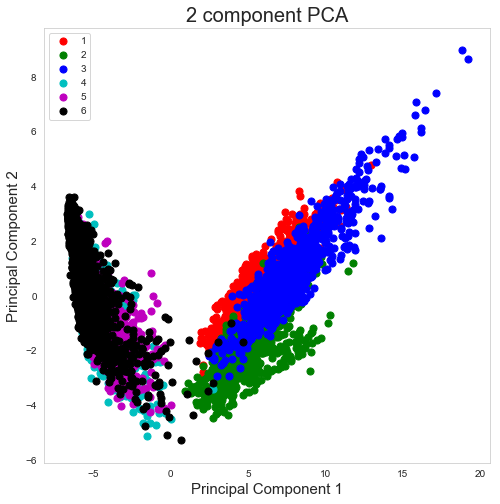

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, train[['label']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,2,3,4,5,6]
colors = ['r', 'g', 'b', 'c', 'm', 'k']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#### Activity Labels
1 WALKING
2 WALKING_UPSTAIRS
3 WALKING_DOWNSTAIRS
4 SITTING
5 STANDING
6 LAYING